In [ ]:
# Подключаем Google диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Zero-Shot Object Detection with Grounding DINO

---

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499)

Grounding DINO can detect **arbitrary objects** with human inputs such as category names or referring expressions. The key solution of open-set object detection is introducing language to a closed-set detector DINO. for open-set concept generalization. If you want to learn more visit official GitHub [repository](https://github.com/IDEA-Research/GroundingDINO) and read the [paper](https://arxiv.org/abs/2303.05499).

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

## Complementary Materials

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/grounding-dino-zero-shot-object-detection) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/cMa77r3YrDk)

We recommend that you follow along in this notebook while reading the blog post on Grounding DINO. We will talk about the advantages of Grounding DINO, analyze the model architecture, and provide real prompt examples.

![grounding dino](https://media.roboflow.com/notebooks/examples/grounding-dino.png)

## ⚠️ Disclaimer

Grounding DINO codebase is still under development. If you experience any problems with launching the notebook, please let us know and create [issues](https://github.com/roboflow/notebooks/issues) on our GitHub.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install Grounding DINO 🦕
- Download Grounding DINO Weights 🏋️
- Download Example Data
- Load Grounding DINO Model
- Grounding DINO Demo
- Grounding DINO with Roboflow Dataset
- 🏆 Congratulations

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Apr 13 10:48:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
#HOME = os.getcwd()
HOME = '/content/drive/MyDrive/HAKATON'
if not os.path.exists(HOME):
    os.makedirs(HOME)

print(HOME)

/content/drive/MyDrive/HAKATON


## Install Grounding DINO 🦕

In [ ]:
%cd {HOME}
#!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content/drive/MyDrive/HAKATON
/content/drive/MyDrive/HAKATON/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 13.1 MB/s eta 0:00:00


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/HAKATON/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [ ]:
%cd {HOME}
#!mkdir {HOME}/weights
%cd {HOME}/weights

#!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/drive/MyDrive/HAKATON
/content/drive/MyDrive/HAKATON/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/HAKATON/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/drive/MyDrive/HAKATON/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# @title Вспомогательные функции

import time

# Контекстный менеджер для измерения времени операций
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        # Расчет времени выполнения
        result_time = time.time()-self.t
        hour = int(result_time//3600)
        min = int(result_time//60)-hour*60
        sec = int(round(result_time%60))
        msec = round(1000*result_time%60)

        if hour > 0:
          print('Время обработки: ' + str(hour)+' час. ' + str(min)+' мин.')
        elif min > 0:
          print('Время обработки: ' + str(min)+' мин. ' + str(sec)+' сек.')
        elif sec > 0:
          print('Время обработки: ' + str(sec)+' сек.')
        else:
          print('Время обработки: ' + str(msec)+' мс.')

# Загрузка и распаковка изображений

https://drive.google.com/file/d/1c1xi5pvwEh1vGLvainJfXrzJn-EjfenX/view?usp=sharing

https://pylot.me/article/35-rabota-s-zip-arhivami-s-pomoshyu-python/

In [ ]:
DATA_PATH = os.path.join(HOME, 'data')
IMAGE_PATH = os.path.join(DATA_PATH, 'images')
LABEL_PATH = os.path.join(DATA_PATH, 'labels')


if not os.path.exists(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)

if not os.path.exists(LABEL_PATH):
    os.makedirs(LABEL_PATH)

In [ ]:
%cd {DATA_PATH}

/content/drive/MyDrive/HAKATON/data


In [ ]:
import gdown
import zipfile

output = gdown.download('https://drive.google.com/uc?id=1c1xi5pvwEh1vGLvainJfXrzJn-EjfenX', None, quiet=True)
print(output)

# Распаковываем архив в текущую директорию
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(IMAGE_PATH)

price_tags_images.zip


## Grounding DINO

In [ ]:
import os
import supervision as sv

In [ ]:
def detect(path, promt):
  IMAGE_PATH = path

  TEXT_PROMPT = promt
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25

  image_source, image = load_image(IMAGE_PATH)

  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

  %matplotlib inline
  sv.plot_image(annotated_frame, (16, 16))

In [ ]:
def extract_data(path, promt):
  IMAGE_PATH = path

  TEXT_PROMPT = promt
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25

  image_source, image = load_image(IMAGE_PATH)

  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  return boxes, logits, phrases

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [ ]:
with timex():
  # Создаем датафрейм pandas для сохранения данных
  Data_df = pd.DataFrame(columns=['filename','box', 'logit', 'phrase'])

  files_list = os.listdir(IMAGE_PATH)

  for f in files_list:
    path = os.path.join(IMAGE_PATH, f)
    ext = os.path.splitext(path)[1]
    if ext in ['.png','.jpg']:
      boxes, logits, phrases = extract_data(os.path.join(IMAGE_PATH, f), 'price tag')
      for n in range(len(boxes)):
        # Добавляем данные в датафрейм
        Data_df.loc[len(Data_df.index)] = [f, boxes[n].tolist(), logits[n].tolist(), phrases[n]]

Время обработки: 2 мин. 13 сек.


In [ ]:
import pathlib

directory = pathlib.Path(DATA_PATH)

with zipfile.ZipFile("images_with_annotations.zip", mode="w") as archive:
  for file_path in directory.rglob("*"):
    archive.write(file_path,
                  arcname=file_path.relative_to(directory)
                 )

In [ ]:
# Сохранияем датафрейм Pandas в формате pickle, чтобы после загрузки сохралились списки
Data_df.to_pickle(os.path.join(DATA_PATH, 'Images_Data.pickle'))

In [ ]:
os.path.join(DATA_PATH, 'Images_Data.pickle')

'/content/drive/MyDrive/HAKATON/data/Images_Data.pickle'

In [ ]:
'/content/drive/MyDrive/HAKATON/data/Images_Data.pickle'

In [ ]:
# Считываем датафрейм Pandas в формате pickle
Data_df = pd.read_pickle(os.path.join(DATA_PATH, 'Images_Data.pickle'))

# Отображаем формат данных
display(Data_df.head())

CLASS_LIST = Data_df['phrase'].unique().tolist()
print(f'Список классов: {CLASS_LIST}')

,filename,box,logit,phrase


Список классов: []


**ВНИМАНИЕ, ФУНКЦИЯ НИЖЕ С ОШИБКОЙ! ПРОВЕРИТЬ ЕСЛИ БУДЕШЬ ИСПОЛЬЗОВАТЬ**

In [ ]:
for f in files_list:
  try:
    sub_df = Data_df[Data_df['filename'] == f]
    with open(os.path.join(LABEL_PATH,f[:-3]+"txt"), 'w') as annotation:
      for i in sub_df.index:
        #print(f, i)
        line = str(CLASS_LIST.index(sub_df.loc[i]['phrase']))
        for coord in Data_df.loc[i]['box']:
          line += ' '+ str(coord)
        #print(line)
        annotation.write(line)
  except:
    print(f'Файла {f} нет в таблице!')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

type_object = '.txt'
counter = 0
max_counter = 5

for ii in os.walk(IMAGE_PATH):
    for j in ii[2]:
        ext = j.split(".")[1]
        if ext not in ['jpg','png']:
            continue
        counter +=1
        if counter > max_counter: break
        path_img = os.path.join(IMAGE_PATH, j)
        label_name = j[:-4] + type_object
        path_label = os.path.join(LABEL_PATH, label_name)
        if os.path.exists(path_label) != True:
            continue
        f = open(path_label, 'r+', encoding='utf-8')
        print(path_img)
        img = cv2.imread(path_img)
        w = img.shape[1]
        h = img.shape[0]
        new_lines = []
        hands_lines = []
        img_tmp = img.copy()
        while True:
            line = f.readline()
            if line:
                msg = line.split(" ")
                # print(x_center,",",y_center,",",width,",",height)
                x1 = int((float(msg[1]) - float(msg[3]) / 2) * w)  # x_center - width/2
                y1 = int((float(msg[2]) - float(msg[4]) / 2) * h)  # y_center - height/2
                x2 = int((float(msg[1]) + float(msg[3]) / 2) * w)  # x_center + width/2
                y2 = int((float(msg[2]) + float(msg[4]) / 2) * h)  # y_center + height/2
                # print(x1, ",", y1, ",", x2, ",", y2)
                cv2.rectangle(img_tmp, (x1, y1), (x2, y2), (0, 0, 255), 5)
            else: break
        cv2_imshow(img_tmp)

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

# Подготовка данных для обучения YOLO8n

In [ ]:
import shutil

# Где хранятся картинки
images_dir = IMAGE_PATH

# Где хранятся метки
bbox_dir = LABEL_PATH

# Папки для датасета
dataset_path = os.path.join(HOME,'DataSet_1')
train_box = os.path.join(dataset_path, 'train')
val_box = os.path.join(dataset_path,'valid')

os.makedirs(val_box, exist_ok=True)
os.makedirs(os.path.join(val_box,'images'), exist_ok=True)
os.makedirs(os.path.join(val_box,'labels'), exist_ok=True)
os.makedirs(train_box, exist_ok=True)
os.makedirs(os.path.join(train_box,'images'), exist_ok=True)
os.makedirs(os.path.join(train_box,'labels'), exist_ok=True)

In [ ]:
test_path = HOME
for path in os.listdir(test_path):
  full_path = os.path.join(test_path ,path)
  if os.path.isdir(full_path):
    print('Файлов в', path, 'всего', len(os.listdir(full_path)))

Файлов в data всего 5
Файлов в GroundingDINO всего 248
Файлов в weights всего 1
Файлов в DataSet_1 всего 2


In [ ]:
# Создаем датасет для сегментации
files_list = os.listdir(bbox_dir)
files_list.sort()

for i in range(len(files_list)):
  # Каждый 9 из 10 в val
  if i%10 == 9:
    shutil.move(os.path.join(bbox_dir,files_list[i]), os.path.join(val_box,'labels'))
    shutil.move(os.path.join(images_dir,files_list[i][:-3]+'jpg'),os.path.join(val_box,'images'))
  else:
    shutil.move(os.path.join(bbox_dir,files_list[i]), os.path.join(train_box,'labels'))
    shutil.move(os.path.join(images_dir,files_list[i][:-3]+'jpg'),os.path.join(train_box,'images'))

In [ ]:
# Создание файла yaml
with open(os.path.join(dataset_path,'data.yaml'), 'w') as f:
  f.write('path: '+str(dataset_path))
  f.write('\ntrain: '+str(os.path.join(dataset_path,'train')))
  #f.write('\ntest: '+str(os.path.join(dataset_path,'test')))
  f.write('\nval: '+str(os.path.join(dataset_path,'val')))

  f.write('\nnc: '+ str(len(CLASS_LIST)))

  f.write('\nnames: ' + str(CLASS_LIST))

with open(os.path.join(dataset_path,'data.yaml'), 'r') as f:
  print(f.read())

# Архивирование датасета

In [ ]:
with zipfile.ZipFile("dataset_price_tags.zip", mode="w") as archive:
  for file_path in dataset_path.rglob("*"):
    archive.write(file_path,
                  arcname=file_path.relative_to(dataset_path)
                 )

## Загрузка пользовательского набора данных (размеченного датасета) для дообучения YOLOv8

<h3>Структура пользовательского набора данных</h3>

>Обратите внимание, что для дообучения Yolov8 нужна определенная структура папок и файлов:

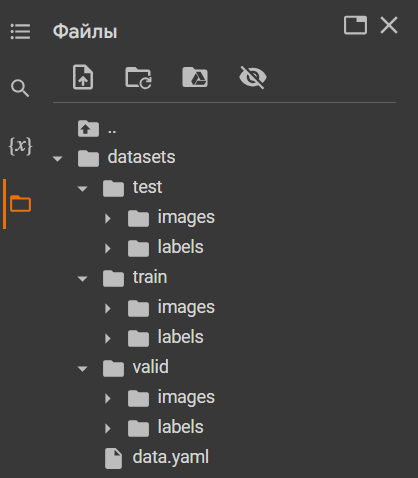

<h3>В файле конфигурации data.yaml для yolov8 показывается:</h3>

- количество классов
- название классов
- расположение изображений и аннотации к ним для тренировочного, валидационного и тестового набора


> Пример:

`train: ../train/images`

`val: ../valid/images`

`test: ../test/images`


`nc: 1`

`names: ['pencil']`










In [ ]:
import os
import glob

# Путь к папке с файлами labels
labels_path = "/content/drive/MyDrive/WEB/DataSetSeg/train/labels/"

# Путь к папке с файлами images
images_path = "/content/drive/MyDrive/WEB/DataSetSeg/train/images/"

# Получаем список всех файлов в папке labels с расширением .txt
labels_files = glob.glob(labels_path + "*.txt")

# Получаем список всех файлов в папке images с расширением .jpg
images_files = glob.glob(images_path + "*.jpg")

# Переменные для подсчета количества файлов
total_labels = len(labels_files)
total_images = len(images_files)

# Цикл для проверки и удаления файлов
for label_file in labels_files:
    # Получаем название файла без расширения
    filename = os.path.splitext(os.path.basename(label_file))[0]

    # Проверяем, есть ли файл с таким же названием в папке images
    if not any(filename in image_file for image_file in images_files):
        # Если файла нет, удаляем файл из папки labels
        os.remove(label_file)
        total_labels -= 1

# Выводим итоговое количество файлов
print("Количество файлов в папке labels:", total_labels)
print("Количество файлов в папке images:", total_images)

<h3>Пример изображения из тестого набора и аннотации для этого изображения:</h3>

Изображение:

In [ ]:
from IPython.display import display, Image
import random

In [ ]:
from IPython.display import display, Image
index = random.randint(0,total_images-1)
Image(filename=images_files[index], height=400)


Аннотация


In [ ]:
print('Аннотация')
with open(labels_files[index]) as f:
  print(f.read())

## Дообучение YOLOv8 на пользовательском датасете



Загрузка библиотеки `ultralytics` для Yolov8

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(data="/content/drive/MyDrive/WEB/DataSetSeg/data.yaml", epochs=100)

Графики обучения

In [ ]:
Image(filename=f'/content/runs/segment/train/results.png', width=1000)

In [ ]:
Image(filename=f'/content/runs/segment/train/confusion_matrix_normalized.png', width=1000)

Предсказание для тестового набора

>ВНИМАНИЕ!!! Перед запуском следующей ячейки перезапустите среду выполнения. Иначе может возникнуть ошибка:

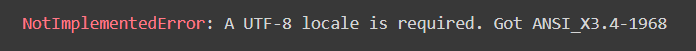




In [ ]:
import locale
print(locale.getpreferredencoding())
locale.getpreferredencoding = lambda: "UTF-8"
print(locale.getpreferredencoding())

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/datasets/test/images save=True

## Предикт

Загрузим веса ранее дообученной модели на 100 эпохах



In [ ]:
import gdown
import zipfile

url = "https://drive.google.com/uc?id=1eD9AOZIC9YCr8TfN3yRoMbbFNloW3m-R"
output = "ves.zip"

# Скачиваем zip архив
gdown.download(url, output, quiet=False)

# Распаковываем архив в текущую директорию
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/segment/train/weights/best.pt') # загружаем наши веса в модель

Предсказание

In [ ]:
results = model.predict(source='/content/drive/MyDrive/WEB/Images/IMG_0498_000881.jpg', conf=0.6)

Расшифровка объекта `results`

In [ ]:
bboxes_ = results[0].boxes.xyxy.tolist()
bboxes = list(map(lambda x: list(map(lambda y: int(y), x)), bboxes_))
confs_ = results[0].boxes.conf.tolist()
confs = list(map(lambda x: int(x*100), confs_))
classes_ = results[0].boxes.cls.tolist()
classes = list(map(lambda x: int(x), classes_))
cls_dict = results[0].names
class_names = list(map(lambda x: cls_dict[x], classes))

In [ ]:
print('координаты рамки:',bboxes)
print('уверенность:', confs)
print('класс объекта:', classes)
print('имя класса:', class_names)

Координаты ограничивающей рамки

In [ ]:
x1 = int(bboxes_[0][0])
y1 = int(bboxes_[0][1])
x2 = int(bboxes_[0][2])
y2 = int(bboxes_[0][3])

Изображение вместе с предсказанной ограничивающей рамкой



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Загрузка изображения
img = cv2.imread('/content/drive/MyDrive/WEB/Images/IMG_0498_000881.jpg')

# Создание bounding box
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Вывод результата на экран
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()